# Sympy: Symbolic Mathematics in Python

SymPy is a Python library for symbolic mathematics. It aims to be an alternative to systems such as Mathematica and Wolfram Walpha while keeping the code as simple as possible and easily extensible. SymPy is written entire in Python and does not require any external libraries.

SymPy documentation and packages for installation can be found at https://www.sympy.org/. Much of this material is drawn from the SciPy lecture notes, found here: https://www.scipy-lectures.org/packages/sympy.html.

In [129]:
import sympy as sym

SymPy allows for control of the display of the output. From here we can use the following setting for fancy printing:

In [107]:
sym.init_printing()

## First Steps

SymPy defines three numerical types: `Real`, `Rational` and `Integer`.

The Rational class represents a rational number as a pair of two Integers: the numerator and the denominator, so `Rational(1, 2)` represents $\frac{1}{2}$, `Rational(5, 2)` represents $\frac{5}{2}$ and so on.

In [108]:
a = sym.Rational(1,2)
a

In [109]:
a*2

SymPy uses `mpmath` in the background, which makes it possible to perform computations using arbitrary-precision arithmetic. That way, some constants such as $e$, $\pi$, $\inf$, are treated as symbols and can be evaluated with arbitrary precision:

In [110]:
sym.pi**2

In [111]:
sym.pi.evalf()

In [112]:
(sym.pi + sym.exp(1)).evalf()

`evalf` evaluates the expression to a floating-point number. This can be potentially up to $n$ precision, as needed:

In [113]:
sym.pi.evalf(50)

## Symbols

In constrast to many other Computer Algebra systems, in SymPy you have to declare symbolic variables explicitly:

In [114]:
x = sym.Symbol("x")
y = sym.Symbol("y")

Then you can manipulate them:

In [115]:
x + y + x - y

In [116]:
(x + y)**2

Multiple symbols can be defined at once, as:

In [117]:
x, y, z = sym.symbols("x y z")
x

## Basic Operations

Here we show some of the most basic operations needed for expression manipulation in SymPy. 

### Substitution

One of the most common things you might want to do with a mathematical expression is *substitution*. Substitution replaces all instances of something in an expression with something else. It is achieved using the `subs` method.

In [118]:
expr = sym.cos(x) + 1
expr.subs(x, y)

Substitution is usually done for one of two reasons:

1. Evaluating an expression at a point. For instance, if our expression is $\cos(x)+1$ and we want to evaluate it at the point $x=0$, such that we get $\cos(0)+1=2$.

In [119]:
expr.subs(x, 0)

2. Replacing a subexpression with another subexpression. There are a number of reasons why we want to do this. The first is that if we are trying to build an expression with symmetry, such as x^x^x.

In [120]:
expr = x ** y
expr

In [121]:
expr = expr.subs(y, x**y)
expr

In [122]:
expr = expr.subs(y, x**x)
expr

Another case is if we want to perform controlled simplification, or a simplification that SymPy is otherwise unable to do. For example, take $\sin(2x)+\cos(2x)$, and we want to replace $\sin(2x)$ with $2\sin(x)\cos(x)$. The function `expand_trig()` achieves this, but will also expand $\cos(2x)$, which we may not want. One of the easiest ways to prevent this is a manual substitution:

In [123]:
expr = sym.sin(2*x) + sym.cos(2*x)
sym.expand_trig(expr)

In [124]:
expr.subs(sym.sin(2*x), 2*sym.sin(x)*sym.cos(x))

### Converting Strings to SymPy Expressions

The function `sympify` can be used to convert Python strings into SymPy expressions:

In [125]:
str_expr = "x**2 + 3*x - 1/2"
sym.sympify(str_expr)

**WARNING**: `sympify` uses `eval`. Does use it on unsanitized input.

### lambdify

`subs` and `evalf` are good if you wish to do simple evaluation, but if you intend to evaluate an expression at many points, there are more efficient ways. For example, if you wanted to evaluate an expression with 1000 points, using SymPy would be far slower than it needs to be, especially if you care about machine precision. Instead, use libraries like `NumPy` and `SciPy`.

Alternatively, a SymPy expression can be converted to be numerically evaluated using `lambdify`. This acts as a lambda function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. 

In [127]:
import numpy as np
a = np.arange(10)
expr = sym.sin(x)
f = sym.lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

## Algebraic Manipulations

SymPy is capable of performing powerful algebraic manipulations. We'll take a look into some of the most frequently used: expand and simplify.

When we expand an algebraic expression, SymPy will try to denest powers and multiplications:

In [14]:
sym.expand((x + y) ** 3)

Further options can be given in form on keywords:

In [15]:
sym.expand(x + y, complex=True)

In [16]:
sym.expand(sym.cos(x + y), trig=True)

We can use simplify to transform an expression into a *simpler* form:

In [18]:
sym.simplify((x + x * y) / x)

In [131]:
sym.simplify(sym.gamma(x) / sym.gamma(x - 2))

Where `sym.gamma(x)` is $\Gamma(x)$, the gamma function.

`collect()` collects common powers of a term in an expression, for example:

In [135]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [136]:
sym.collect(expr, x)

### Power Simplifications

Before we introduce the power simplification functions, we will cover the basic mathematical identities held by powers. There are three kinds of identities satisfied by exponents:

1. $x^ax^b=x^{a+b}$
2. $x^ay^a=(xy)^a$
3. $(x^a)^b=x^{ab}$

Identity 1 is always true. Identities 2 and 3 are not always true, with specific examples not covered in this material. 

In [147]:
a, b = sym.symbols("a b", real=True)
x, y = sym.symbols("x y", positive=True)
sym.powsimp(x**a*x**b)

In [148]:
sym.powsimp(x**a*y**a)

### Exponential and logarithms

Logarithms have similar issues as powers, there are two main identities:

1. $\log(xy)=\log(x) + \log(y)$
2. $\log(x^n)=n\log(x)$

Neither identity is true for arbitrary complex $x$ and $y$, due to the branch cut in the complex plane for the complex algorithm. The identities hold if $x$ and $y$ are positive and $n$ is real.

In [150]:
n = sym.Symbol("n", real=True)

Note that identity:

$$
\log\left(\frac{x}{y}\right)=\log(x)-\log(y)
$$

is a special case of identities 1 and 2, and holds if $x$ and $y$ are positive. In addition,

$$
\log(e^x)=x \\
\log(e^x)=x\log(e)=x
$$

and holds when $x$ is real.

In [151]:
sym.expand_log(sym.log(x*y))

In [152]:
sym.expand_log(sym.log(x/y))

### Special Functions

In [153]:
sym.factorial(n)

In [155]:
sym.binomial(n, k)

In [156]:
sym.gamma(z)

## Calculus

Now we get into the juicy stuff! SymPy can perform a host of impressive calculus operations:

### Limits

Limits are easy to use in SymPy, they follow the syntax `limit(function, variable, point)`, so to compute the limit of $f(x)$ as $x \to 0$, you would issue `limit(f, x, 0)`:

In [24]:
sym.limit(sym.sin(x) / x, x, 0)

We can also calculate the limit at infinity:

$$
\lim_{x \to \infty} x
$$

In [25]:
sym.limit(x, x, sym.oo)

$$
\lim_{x \to \infty} \frac{1}{x}
$$

In [26]:
sym.limit(1 / x, x, sym.oo)

$$
\lim_{x \to 0} x^x
$$

In [28]:
sym.limit(x**x, x, 0)

Limit as an unevaluated counterpart, `Limit`:

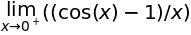

In [185]:
expr = sym.Limit((sym.cos(x) - 1)/x, x, 0)
expr

In [186]:
expr.doit()

### Differentiation

You can differentiate any SymPy expression using `diff(func, var)`, for example:

$$
\frac{\text{d}\cos(x)}{\text{d}x}=-\sin(x)
$$

In [157]:
sym.diff(sym.cos(x), x)

$$
\frac{\text{d}\sin(2x)}{\text{d}x}=2\cos(2x)
$$

In [30]:
sym.diff(sym.sin(2*x), x)

In [31]:
sym.diff(sym.tan(x), x)

Higher derivatives can be calculated by adding the parameter $n$ to the method, as follows:

In [32]:
sym.diff(sym.sin(2*x), x, 2)

In [33]:
sym.diff(sym.sin(2*x), x, 3)

`diff` can also take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number:

In [158]:
sym.diff(x**4, x, x, x)

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same single as for single variable derivatives:

In [160]:
expr = sym.exp(x*y*z)
expr

In [161]:
sym.diff(expr, x, y, y, z, z, x)

To create an unevaluated derivative, use the `Derivative` class. It has the same syntax as `diff()`:

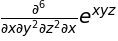

In [162]:
deriv = sym.Derivative(expr, x, y, y, z, z, x)
deriv

In [163]:
deriv.doit()

### Series Expansion

SymPy also knows how to compute the Taylor series of an expression at a point. Use `series(expr, var)`, like so:

In [34]:
sym.series(sym.cos(x), x)

In [35]:
sym.series(1 / sym.cos(x), x)

In [188]:
expr = sym.exp(sym.sin(x))
expr.series(x, 0, 4)

### Integration

SymPy has support for indefinite and definite integration of transcendental elementary and special functions via `integrate()`, which uses the powerful extended Risch-Norman algorithm, some heuristics and pattern matching. You can integrate elementary functions:

$$
\int_{-\infty}^{\infty} 6x^5 dx
$$

In [36]:
sym.integrate(6 * x**5, x)

$$
\int_{-\infty}^{\infty} \sin(x) dx
$$

In [37]:
sym.integrate(sym.sin(x), x)

$$
\int_{-\infty}^{\infty} \log(x) dx
$$

In [38]:
sym.integrate(sym.log(x), x)

$$
\int_{-\infty}^{\infty} 2x + \sinh(x)
$$

In [39]:
sym.integrate(2*x + sym.sinh(x), x)

Also special functions are handled rather nicely:

$$
\int_{-\infty}^{\infty} e^{x^2} \text{erf}(x)
$$

In [40]:
sym.integrate(sym.exp(-x**2) * sym.erf(x), x)

It is possible to compute definite integrals assuming that the lower and upper bounds of an interval are provided:

$$
\int_{-1}^1 x^3 dx
$$

In [41]:
sym.integrate(x**3, (x, -1, 1))

$$
\int_0^{\pi/2} \sin(x) dx
$$

In [42]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

$$
\int_{-\pi/2}^{\pi/2} \cos(x) dx
$$

In [43]:
sym.integrate(sym.cos(x), (x, -sym.pi / 2, sym.pi / 2))

Definite integrals also support improper integrals:

$$
\int_0^{\infty} e^{-x} dx
$$

In [44]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))b

As with `Derivative`, you can create an unevaluated integral using `Integral`. To later evaluate this integral, call `doit()`:

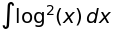

In [178]:
expr = sym.Integral(sym.log(x)**2, x)
expr

In [179]:
expr.doit()

In [184]:
y = sym.symbols("y")
integ = sym.Integral(x**y*sym.exp(-x), (x, 0, sym.oo))
integ.doit()

⎧ Γ(y + 1)    for -re(y) < 1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

### Finite Differences

So far we have looked at expressions with analytic derivatives and primitive functions respectively. But what if we want to have an expression to estimate a derivative of a curve for which we lack a closed form representation, or for which we don't know the functional values for yet. One approach is using a *finite difference* approach.

In [193]:
f, g = sym.symbols("f g", cls=sym.Function)
sym.differentiate_finite(f(x)*g(x))

If we want to expand the intermediate derivative we can pass the flag `evaluate=True`:

In [194]:
sym.differentiate_finite(f(x)*g(x), evaluate=True)

This method can be applied to `Derivative` instances as such:

In [195]:
f = sym.Function("f")
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

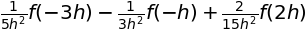

In [197]:
h = sym.Symbol("h")
d2fdx2 = f(x).diff(x, 2)
d2fdx2.as_finite_difference([-3*h, -h, 2*h])

## Equation solving

SymPy is able to solve algebraic equations, in one and several variables using the `solveset()` function:

In [45]:
sym.solveset(x**4 - 1,b x)

As you can see it takes as a first argument an expression that is supposed to be equal to $0$. It also has limited support for transcendental equations:

In [46]:
sym.solveset(sym.exp(x) + 1, x)

## Systems of linear equations

SymPy is able to solve a large part of polynomial equations, and is also capable of solving multiple equations with respect to multiple variables, by providing a tuple as a secondary argument. To do this we use the `solve()` command:

In [48]:
(x + 5 * y - 2, -3 * x + 6 * y - 15)

In [47]:
sol = sym.solve((x + 5 * y - 2, -3 * x + 6 * y - 15), (x, y))
sol

Another alternative in the case of polynomial equations is _factor_. Factor returns the polynomial factorized into irreducible terms, and is capable of computing the factorization over various domains:

In [56]:
f = x ** 4 - 3 * x ** 2 + 1
sym.factor(f)

In [57]:
sym.factor(f, modulus=5)

SymPy is also able to solve boolean equations, that is, to decide if a certain boolean equation is satisfiable or not. For this, we have the function `satisfiable()`:

In [58]:
sym.satisfiable(x & ~x)

False

## Linear Algebra

Now we've covered most of the basics, we probably want to scale the concepts mentioned previously up to *vectors* and *matrices*:

## Matrices

Matrices are created as instances from a `Matrix` class:

In [59]:
sym.Matrix([[1, 0], [0, 1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

Unlike a NumPy array, you can also put Symbols in it:

In [61]:
x, y = sym.symbols("x, y")
A = sym.Matrix([[1, x], [y, 1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [62]:
A**2

⎡x⋅y + 1    2⋅x  ⎤
⎢                ⎥
⎣  2⋅y    x⋅y + 1⎦

SymPy also allows different manners of matrix creation, such as a list of values with the dimensional inputs separately:

In [86]:
sym.Matrix(2, 3, [1, 2, 3, 4, 5, 6])

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

More interestingly, we can use a 2-variable function or `lambda` to make one. Here we create an indicator function which is 1 on the diagonal and then use it to make the *identity matrix*:

In [87]:
def f(i, j):
    if i == j:
        return 1
    else:
        return 0
    
sym.Matrix(4,4,f)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [88]:
sym.Matrix(3, 4, lambda i,j: 1 - (i+j) % 2)

⎡1  0  1  0⎤
⎢          ⎥
⎢0  1  0  1⎥
⎢          ⎥
⎣1  0  1  0⎦

There are a number of built-in special constructors for quick matrix construction - such as `eye`, `zeros`, `ones` and `diag`:

In [90]:
sym.eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [91]:
sym.zeros(2)

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

### Differential Equations

SymPy is capable of solving some Ordinary Differential. To solve differential equations, SymPy uses a function called `dsolve()`. First we create an undefined function by passed `cls=Function` to the symbols function:

In [63]:
f,g = sym.symbols("f g", cls=sym.Function)

In [64]:
f(x)

$f$ and $g$ are now undefined functions. We can call $f(x)$, and it will represent an unknown function.

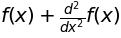

In [65]:
f(x).diff(x, x) + f(x)

In [66]:
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Keywords arguments can be given to this function in order to help to find the best possible reso0lution system. For example, if you know that we are dealing with separable equations, you can use keyword `hint='separable'` to force `dsolve` to resolve it as such:

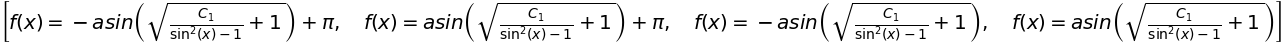

In [67]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x),
           f(x), hint="separable")

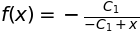

In [83]:
h = x*f(x).diff(x) + f(x)-f(x)**2
sym.dsolve(h, f(x))

We've barely scratched the surface of SymPy, please see the documentation and the main GitHub repository here for more information: https://github.com/sympy/sympy/wiki/Tutorial.

## Tasks

### Task 1